In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import scipy.stats as sps
import os
import lmfit as lm
from collections import OrderedDict

In [2]:
def getTimeStamp():
    """Returns a human-readable string representation of the current time"""
    import time
    from datetime import datetime
    return datetime.now().strftime("%Y-%m-%d–%H%M%S")

In [3]:
def getOutpath():
    """Returns (and creates, if necessary) the path to a directory called “out” inside the current directory."""
    import os
    outpath = os.path.join(os.getcwd(), 'out')
    if not os.path.isdir(outpath) and os.path.lexists(outpath):
        os.path.mkdir(outpath)
    return outpath

In [4]:
# Load the data
T = OrderedDict()

# K1
T['K1'] = OrderedDict()
T['K1']['fit_2stage'] = np.load("k1_t0_two.npy")
T['K1']['fit_3stage'] = np.load("k1_t0_three.npy")
T['K1']['cluster_new'] = np.load("20170316_K1_gfp_t0_cluster.npy")
T['K1']['cluster_legacy'] = np.load("k1_t0_cluster.npy")

# K3
T['K3'] = OrderedDict()
T['K3']['fit_2stage'] = np.load("k3_t0_two.npy")
T['K3']['fit_3stage'] = np.load("k3_t0_three.npy")
T['K3']['cluster_new'] = np.load("20170316_K3_gfp_t0_cluster.npy")
T['K3']['cluster_legacy'] = np.load("k3_t0_cluster.npy")

# K5
T['K5'] = OrderedDict()
T['K5']['fit_2stage'] = np.load("k5_t0_two.npy")
T['K5']['fit_3stage'] = np.load("k5_t0_three.npy")
T['K5']['cluster_new'] = np.load("20170316_K5_gfp_t0_cluster.npy")
T['K5']['cluster_legacy'] = np.load("k5_t0_cluster.npy")

# DDC
T['DDC'] = OrderedDict()
T['DDC']['fit_2stage'] = np.load("ddc_t0_two.npy")
T['DDC']['fit_3stage'] = np.load("ddc_t0_three.npy")
T['DDC']['cluster_new'] = np.load("20161006_DDC_gfp_t0_cluster.npy")
T['DDC']['cluster_legacy'] = np.load("ddc_t0_cluster.npy")

# lipo
T['lipo'] = OrderedDict()
T['lipo']['fit_2stage'] = np.load("lipo_t0_two.npy")
T['lipo']['fit_3stage'] = np.load("lipo_t0_three.npy")
T['lipo']['cluster_new'] = np.load("20161006_lipo1_gfp_t0_cluster.npy")
T['lipo']['cluster_legacy'] = np.load("lipo_t0_cluster.npy")

# lipo2
T['lipo2'] = OrderedDict()
T['lipo2']['fit_2stage'] = np.load("lipo2_t0_two.npy")
T['lipo2']['fit_3stage'] = np.load("lipo2_t0_three.npy")
T['lipo2']['cluster_new'] = np.load("20161006_lipo2_gfp_t0_cluster.npy")
T['lipo2']['cluster_legacy'] = np.load("lipo2_t0_cluster.npy")

In [5]:
# Remove NaN values from data
for k1 in T.keys():
    for k2 in T[k1].keys():
        T[k1][k2] = T[k1][k2][np.isfinite(T[k1][k2])].flatten()

In [6]:
# Initialize analysis result dictionary
H = OrderedDict()
for k1 in T.keys():
    H[k1] = OrderedDict()
    for k2 in T[k1].keys():
        H[k1][k2] = OrderedDict()

In [7]:
# Fit distributions to datasets
for k1 in T.keys():
    for k2 in T[k1].keys():

        # Gamma distribution
        res_gamma = sps.gamma.fit(T[k1][k2])
        H[k1][k2]['gamma'] = OrderedDict()
        H[k1][k2]['gamma']['a'] = res_gamma[0]
        H[k1][k2]['gamma']['loc'] = res_gamma[1]
        H[k1][k2]['gamma']['scale'] = res_gamma[2]
        print("{} {} gamma:".format(k1, k2))
        print(H[k1][k2]['gamma'])

        # Lognormal distribution
        res_logn = sps.lognorm.fit(T[k1][k2])
        H[k1][k2]['lognorm'] = OrderedDict()
        H[k1][k2]['lognorm']['s'] = res_logn[0]
        H[k1][k2]['lognorm']['loc'] = res_logn[1]
        H[k1][k2]['lognorm']['scale'] = res_logn[2]
        print("{} {} lognorm:".format(k1, k2))
        print(H[k1][k2]['lognorm'])
        
        # Weibull distribution
        res_weib = sps.weibull_max.fit(T[k1][k2])
        H[k1][k2]['weibull'] = OrderedDict()
        H[k1][k2]['weibull']['c'] = res_weib[0]
        H[k1][k2]['weibull']['loc'] = res_weib[1]
        H[k1][k2]['weibull']['scale'] = res_weib[2]
        print("{} {} weibull:".format(k1, k2))
        print(H[k1][k2]['weibull'])

        # Beta distribution
        res_beta = sps.beta.fit(T[k1][k2])
        H[k1][k2]['beta'] = OrderedDict()
        H[k1][k2]['beta']['a'] = res_beta[0]
        H[k1][k2]['beta']['b'] = res_beta[1]
        H[k1][k2]['beta']['loc'] = res_beta[2]
        H[k1][k2]['beta']['scale'] = res_beta[3]
        print("{} {} beta:".format(k1, k2))
        print(H[k1][k2]['beta'])

K1 fit_2stage gamma:
OrderedDict([('a', 1.5381378735245335), ('loc', 1.4310175811001955), ('scale', 1.1266124542481031)])
K1 fit_2stage lognorm:
OrderedDict([('s', 0.71502670491433751), ('loc', 1.1819139458182439), ('scale', 1.5726069908363318)])
K1 fit_2stage weibull:
OrderedDict([('c', 68923222.66199553), ('loc', 66988877.942288473), ('scale', 66988875.364479244)])
K1 fit_2stage beta:
OrderedDict([('a', 0.9620085751532701), ('b', 2.0864909126680877), ('loc', 1.4533359466407207), ('scale', 5.5084846524068816)])
K1 fit_3stage gamma:
OrderedDict([('a', 3.0765365747746634), ('loc', 0.30086420226748778), ('scale', 0.72709567099741856)])
K1 fit_3stage lognorm:
OrderedDict([('s', 0.49651972856211657), ('loc', -0.031224106014755205), ('scale', 2.2745500988737892)])
K1 fit_3stage weibull:
OrderedDict([('c', 230439531.80823055), ('loc', 218068476.03360653), ('scale', 218068474.07753682)])
K1 fit_3stage beta:
OrderedDict([('a', 3.0008136072634244), ('b', 283199.6827357015), ('loc', 0.3109367720

/home/dawo/Dokumente/Projekte/Onset/Helmut_notebook/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


K3 fit_3stage gamma:
OrderedDict([('a', 6.8944662399711127), ('loc', -0.42801730121713333), ('scale', 0.41943918221038656)])
K3 fit_3stage lognorm:
OrderedDict([('s', 0.30045297699203788), ('loc', -1.1710079316409079), ('scale', 3.4739683828419263)])
K3 fit_3stage weibull:
OrderedDict([('c', 0.66033965696544805), ('loc', 6.0554588609825144), ('scale', 1.4197834898368806)])
K3 fit_3stage beta:
OrderedDict([('a', 5.9787007810348651), ('b', 3631496.0251337113), ('loc', -0.29674859159374029), ('scale', 1682071.3995402385)])
K3 cluster_new gamma:
OrderedDict([('a', 2.3758152591790616), ('loc', 1.2126333792481163), ('scale', 0.77562086539505692)])
K3 cluster_new lognorm:
OrderedDict([('s', 0.43593239739598078), ('loc', 0.44778233792436084), ('scale', 2.3757234494852222)])
K3 cluster_new weibull:
OrderedDict([('c', 0.63919558288822498), ('loc', 6.9916666666666671), ('scale', 1.5494507109351239)])
K3 cluster_new beta:
OrderedDict([('a', 1.312354680572668), ('b', 4.0625647409188996), ('loc', 1.

/home/dawo/Dokumente/Projekte/Onset/Helmut_notebook/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



DDC cluster_legacy gamma:
OrderedDict([('a', 0.1705617567875154), ('loc', 0.16666666666666663), ('scale', 1.6330379410809233)])
DDC cluster_legacy lognorm:
OrderedDict([('s', 0.8173966803023478), ('loc', -0.05908151176120624), ('scale', 0.94860861715857481)])
DDC cluster_legacy weibull:
OrderedDict([('c', 0.51744297456109645), ('loc', 7.6666666666666679), ('scale', 1.4796609131585368)])
DDC cluster_legacy beta:
OrderedDict([('a', 0.19446975054279289), ('b', 722480.7608437005), ('loc', 0.16666666666666663), ('scale', 563154.1472572838)])
lipo fit_2stage gamma:
OrderedDict([('a', 6.7509284472164506), ('loc', -0.38337337377873115), ('scale', 0.60364114369879318)])
lipo fit_2stage lognorm:
OrderedDict([('s', 0.27422346729245473), ('loc', -1.9410452573483754), ('scale', 5.4242740209154334)])
lipo fit_2stage weibull:
OrderedDict([('c', 0.4716566468505724), ('loc', 12.066492556609235), ('scale', 1.5001970037664774)])
lipo fit_2stage beta:
OrderedDict([('a', 5.3590786900757337), ('b', 29.0251

In [8]:
# Print fit results
for k1 in H.keys():
    print(k1)
    for k2 in H[k1].keys():
        print('   ' + k2)
        for k3 in [k for k in H[k1][k2].keys() if k != 'hist']:
            print('      ' + k3)
            for k4, v4 in H[k1][k2][k3].items():
                print("         {}: {}".format(k4, v4))
        

K1
   fit_2stage
      gamma
         a: 1.5381378735245335
         loc: 1.4310175811001955
         scale: 1.126612454248103
      lognorm
         s: 0.7150267049143375
         loc: 1.181913945818244
         scale: 1.5726069908363318
      weibull
         c: 68923222.66199553
         loc: 66988877.94228847
         scale: 66988875.364479244
      beta
         a: 0.9620085751532701
         b: 2.0864909126680877
         loc: 1.4533359466407207
         scale: 5.508484652406882
   fit_3stage
      gamma
         a: 3.0765365747746634
         loc: 0.3008642022674878
         scale: 0.7270956709974186
      lognorm
         s: 0.49651972856211657
         loc: -0.031224106014755205
         scale: 2.2745500988737892
      weibull
         c: 230439531.80823055
         loc: 218068476.03360653
         scale: 218068474.07753682
      beta
         a: 3.0008136072634244
         b: 283199.6827357015
         loc: 0.31093677209423976
         scale: 210625.3959575835
   cluster_new


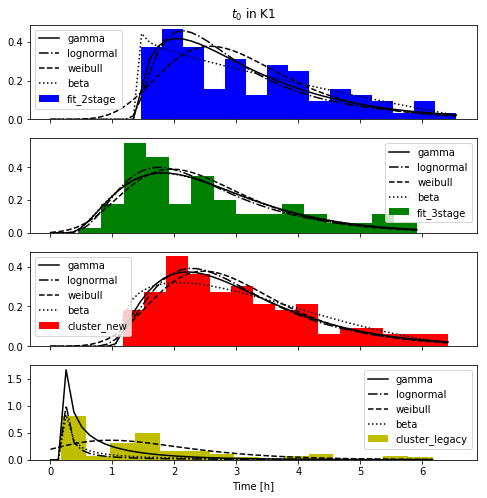

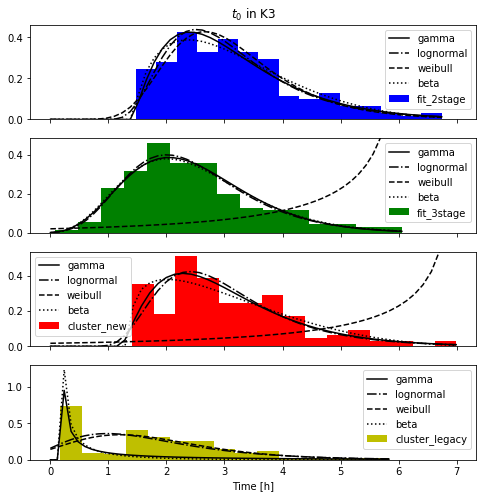

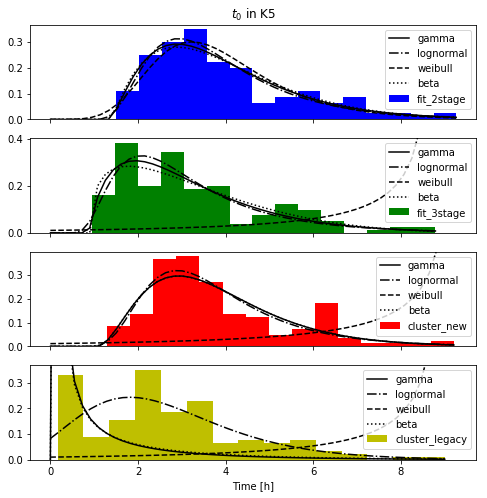

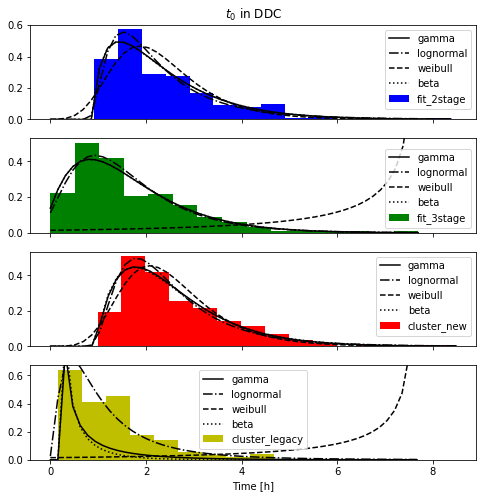

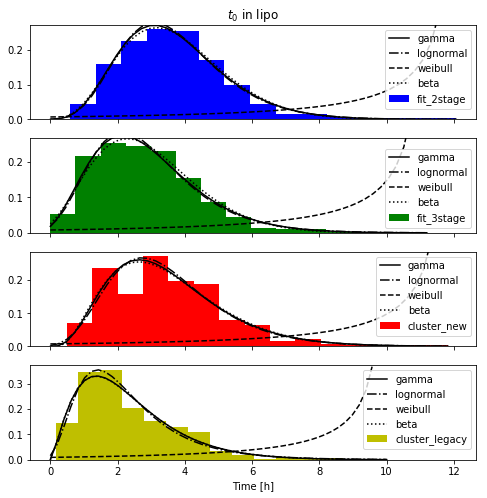

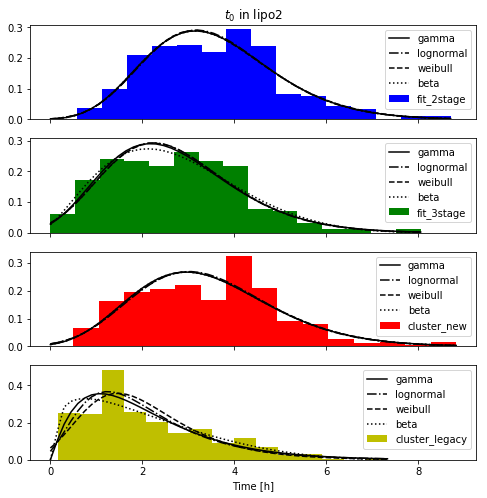

In [9]:
# Histogram properties
nBins = 15 #bin number
cm = ['b','g','r','y'] #colors

with PdfPages(os.path.join(getOutpath(),
    "{}_t0_distributions.pdf".format(getTimeStamp()))) as pdf:
    for k1 in T.keys():
        nDatasets = len(T[k1])
        f = plt.figure()
        f.set_size_inches(8, nDatasets * 2)
        ax = None

        for i, k2 in enumerate(T[k1].keys()):

            # Set up keyword arguments for histogram
            if ax != None:
                hist_kw = {'sharex': ax}
            else:
                hist_kw = {}

            # Make histogram of dataset
            ax = f.add_subplot(4, 1, i+1, **hist_kw)
            #ax.hold(True)
            hdata = ax.hist(T[k1][k2], label=k2, color=cm[i], bins=nBins, normed=True)
            ylim = ax.get_ylim()

            # Store histogram data
            H[k1][k2]['hist'] = {}
            H[k1][k2]['hist']['t'] = (hdata[1][:-1] + hdata[1][1:]) / 2
            H[k1][k2]['hist']['#'] = hdata[0]

            # Plot distributions
            t = np.linspace(0, hdata[1].max())
            ax.plot(t, sps.gamma.pdf(x=t, **H[k1][k2]['gamma']), '-k', label='gamma')
            ax.plot(t, sps.lognorm.pdf(x=t, **H[k1][k2]['lognorm']), '-.k', label='lognormal')
            ax.plot(t, sps.weibull_max.pdf(x=t, **H[k1][k2]['weibull']), '--k', label='weibull')
            ax.plot(t, sps.beta.pdf(x=t, **H[k1][k2]['beta']), ':k', label='beta')
            if ax.get_ylim()[1] > 3 * ylim[1]:
                ax.set_ylim(ylim)

            # Format axes
            if i == 0:
                ax.set_title("$t_0$ in {}".format(k1))
            if i < nDatasets - 1:
                plt.setp(ax.xaxis.get_ticklabels(), visible=False)
            else:
                ax.set_xlabel("Time [h]")
            ax.legend()

        plt.show(f)
        pdf.savefig(f)
        plt.close(f)